# Kuantum Faz Tahmini


Kuantum faz tahmini, kuantum hesaplamada en önemli alt rutinlerden biridir. Birçok kuantum algoritmasının temel yapı taşıdır. Algoritmanın amacı şudur:

Birim operatör $U$ verildiğinde, algoritma $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ içinde $\theta$ değerini tahmin eder. Burada $|\psi\rangle$ bir özvektördür ve $e^{\boldsymbol{2\pi i}\theta}$ karşılık gelen özdeğerdir. $U$ birimsel olduğu için, tüm özdeğerlerinin normu 1'dir.

## 1. Genel Bakış <a id=‘overview’></a>

Faz tahmini için genel kuantum devresi aşağıda gösterilmiştir. Üst kayıt $t$ ‘sayma’ kuantum bitleri içerir ve alt kayıt $|\psi\rangle$ durumundaki kuantum bitleri içerir:

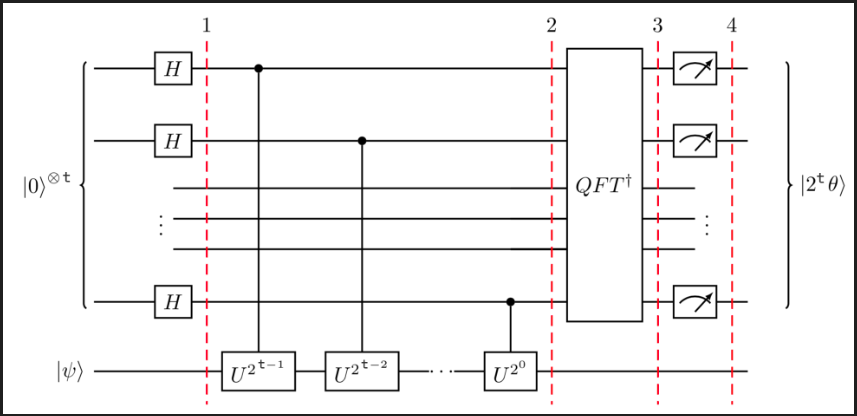

### 1.1 Sezgi <a id=‘intuition’></a>
Kuantum faz tahmin algoritması, faz geri tepmesini kullanarak $U$'nun fazını (Fourier bazında) sayma kaydındaki $t$ kuantum bitine yazar. Ardından, ters QFT'yi kullanarak bunu Fourier bazından ölçebileceğimiz hesaplama bazına çeviririz.

(QFT bölümünden) Fourier bazında en üstteki kuantum bitinin $0$ ile $2^t$ arasında sayarken tam bir dönüş yaptığını hatırlıyoruz. $0$ ile $2^t$ arasında bir sayı olan $x$'e kadar saymak için, bu kuantum bitini z ekseni etrafında $\tfrac{x}{2^t}$ kadar döndürüyoruz. Bir sonraki kuantum bitini $\tfrac{2x}{2^t}$ kadar döndürürüz, ardından üçüncü kuantum bitini $\tfrac{4x}{2^t}$ kadar döndürürüz.

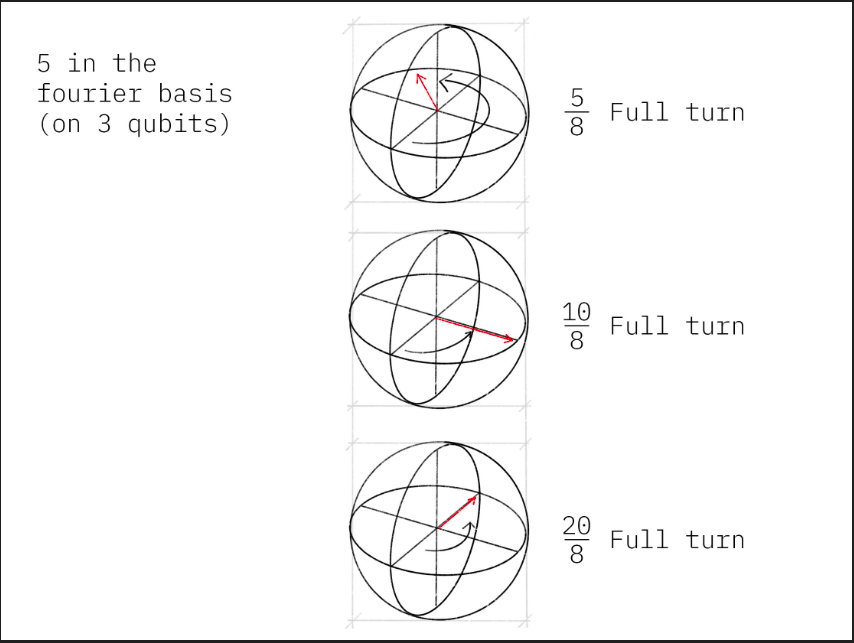

Bir kuantum bitini $U$-kapısını kontrol etmek için kullandığımızda, kuantum biti (geri tepme nedeniyle) $e^{2i\pi\theta}$ fazına orantılı olarak dönecektir. Bu dönüşü, Fourier bazında theta fazını $0$ ile $2^t$ arasındaki bir sayı olarak kodlayana kadar uygun sayıda tekrarlamak için ardışık $CU$-kapıları kullanabiliriz. 

Ardından, bunu hesaplama temeline dönüştürmek için $QFT^\dagger$ kullanırız.

### 1.2 Matematiksel Temel <a id=‘maths’></a>

Yukarıda belirtildiği gibi, bu devre birim operatör $U$'nun fazını tahmin eder. $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ içindeki $\theta$'yı tahmin eder, burada $|\psi\rangle$ bir özvektördür ve $e^{\boldsymbol{2\pi i}\theta}$ karşılık gelen özdeğerdir. Devre aşağıdaki adımlarda çalışır:

i. **Kurulum**: $\vert\psi\rangle$ bir kübit kayıt setindedir. Ek bir $n$ kübit seti, $2^n\theta$ değerini depolayacağımız sayma kaydını oluşturur:



$$ |\psi_0\rangle = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$

 

ii. **Süperpozisyon**: Sayma kaydına $n$-bit Hadamard kapısı işlemi $H^{\otimes n}$ uygulayın:



$$ |\psi_1\rangle = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$



iii. **Kontrollü Birimsel İşlemler**: Sadece karşılık gelen kontrol biti $|1\rangle$ ise hedef kayıt defterine birim operatör $U$ uygulayan kontrollü birim $CU$'yu tanıtmamız gerekir. $U$, $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ olacak şekilde özvektörü $|\psi\rangle$ olan bir birim operatör olduğundan, bu şu anlama gelir: 



$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$



$0\leq j\leq n-1$ ile tüm $n$ kontrollü işlemleri $CU^{2^j}$ uygulayarak ve $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$ ilişkisini kullanarak:

$$
\begin{aligned}
|\psi_{2}\rangle & =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\\\
& = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle
\end{aligned}
$$

burada $k$, n bitlik ikili sayıların tamsayı temsilini ifade eder. 

iv. **Ters Fourier Dönüşümü**: Yukarıdaki ifadenin, [Kuantum Fourier Dönüşümü ve Qiskit Uygulaması](/course/ch-algorithms/quantum-fourier-transform) not defterinde türettiğimiz kuantum Fourier dönüşümünün sonucuyla tam olarak aynı olduğuna dikkat edin. QFT'nin n-qubit giriş durumu $\vert x\rangle$ 'ı şu çıktıya eşlediğini hatırlayın

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

Yukarıdaki ifadede $x$'i $2^n\theta$ ile değiştirirsek, yukarıdaki 2. adımda türetilen ifadeyi elde ederiz. Bu nedenle, $\vert2^n\theta\rangle$ durumunu geri kazanmak için, yardımcı kayıt defterine ters Fourier dönüşümü uygularız. Bunu yaptığımızda, şunu buluruz

$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$

v. **Ölçüm**:
Yukarıdaki ifade $x = 2^n\theta$ yakınında zirve yapar. $2^n\theta$ bir tamsayı olduğunda, hesaplama temelinde ölçüm yapmak yardımcı kayıtta yüksek olasılıkla fazı verir:



$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$



$2^n\theta$ tam sayı olmadığı durumda, yukarıdaki ifadenin yine de $x = 2^n\theta$ yakınında $4/\pi^2 \approx 40\%$ [1]'den daha yüksek bir olasılıkla zirve yaptığı gösterilebilir.

## 2. Örnek: T-kapısı <a id=‘example_t_gate’></a>


İyi bildiğimiz bir kapı olan $T$-kapısını ele alalım ve Kuantum Faz Tahmini kullanarak fazını tahmin edelim. $T$-kapısının $|1\rangle$ durumuna $e^\frac{i\pi}{4}$ fazı eklediğini hatırlayacaksınız:

$$ T|1\rangle = 
\begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}
\begin{bmatrix}
0\\
1\\ 
\end{bmatrix}
= e^\frac{i\pi}{4}|1\rangle $$

QPE bize $\theta$ değerini vereceğinden:



$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$



Şu sonucu bulmayı bekliyoruz:



$$\theta = \frac{1}{8}$$



Bu örnekte üç kuantum bit kullanacağız ve _kesin_ bir sonuç elde edeceğiz (tahmin değil!).

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

Şimdi kuantum devresini kurun. Dört kuantum bit kullanacağız: 0 ila 2 arasındaki kuantum bitleri sayma kuantum bitleri olarak, 3 numaralı kuantum biti ise birim operatörün ($T$) öz durumu olarak kullanacağız.

$X$ kapısı uygulayarak $\vert\psi\rangle = \vert1\rangle$ başlangıç değerini belirliyoruz:

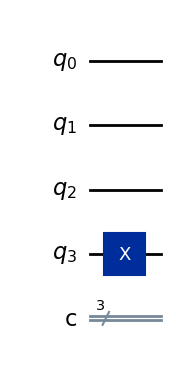

In [11]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw(output='mpl')

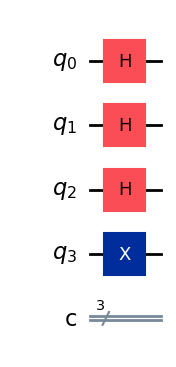

In [12]:
# her bir kubit için Hadarmard kapısı
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(output='mpl')

Ardından kontrollü birim işlemleri gerçekleştiriyoruz.

Qiskit'in [`PhaseGate`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html) işlevini kullanarak $T$ işlemini oluşturacağız. Faz kapısı, $P|1\rangle = e^{i\lambda}|1\rangle$ dönüşümünü gerçekleştirir, burada $\lambda$ bizim sağladığımız açıdır. $T|1\rangle = e^{2\pi i \theta}|1\rangle$ işlemini gerçekleştiren $T$'yi uygulamak istediğimizden, $\lambda = \tfrac{2 \pi}{8} = \pi/4$ olarak ayarlamamız gerekir.

Ayrıca, Qiskit'in kübitlerini genel bakıştaki devre şemasına ters yönde sıraladığını da unutmayın.

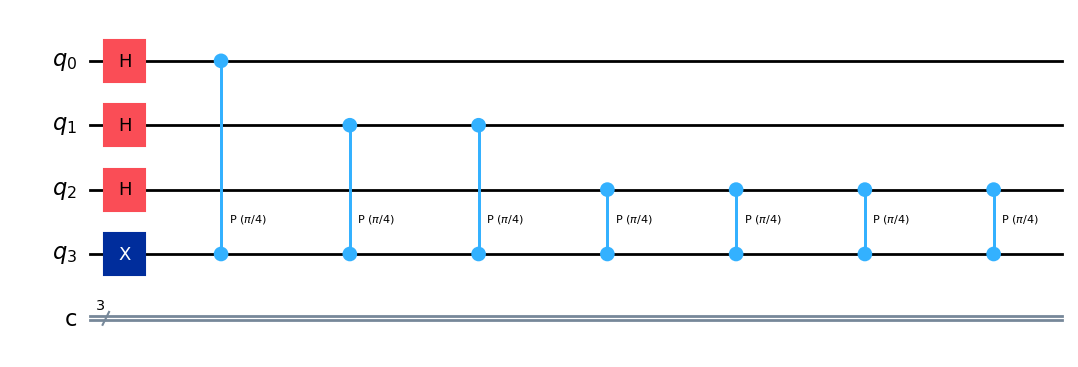

In [13]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe.draw(output='mpl')

Sayma registerının durumunu dönüştürmek için ters kuantum Fourier dönüşümünü uygularız, ardından sayma kaydını ölçeriz:

/tmp/ipykernel_13172/2632721070.py:3: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])


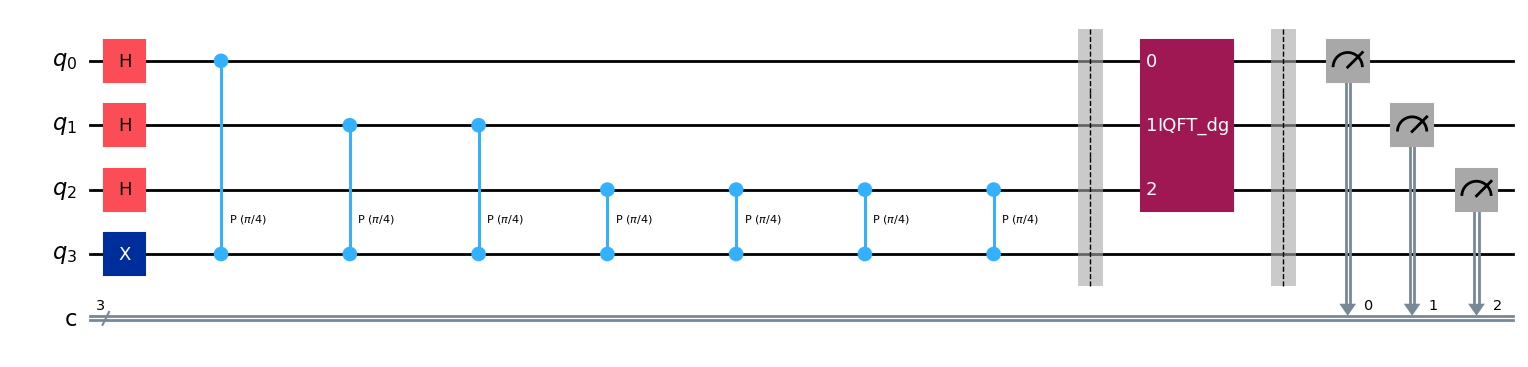

In [14]:
qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw(output='mpl')

In [15]:
sim = AerSimulator()
shots = 2048
t_qpe = transpile(qpe, sim)
results = sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

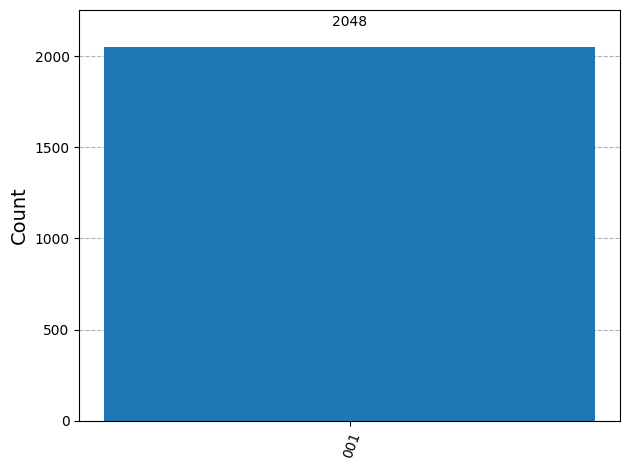

In [16]:
plot_histogram(answer)

Kesin olarak bir sonuç (`001`) elde ettiğimizi görüyoruz, bu da ondalık olarak `1`'e karşılık geliyor. Şimdi sonucumuzu (`1`) $2^n$ ile bölerek $\theta$'yı bulmamız gerekiyor:



$$ \theta = \frac{1}{2^3} = \frac{1}{8} $$



Bu tam da beklediğimiz sonuç!

## 3. Örnek: Daha Fazla Hassasiyet Elde Etmek <a id=‘getting_more_precision’></a>

### 3.1 Sorun <a id=‘the_problem’></a>

$T$-kapısı yerine, $\theta = \frac{1}{3}$ olan bir kapı kullanalım.

Aşağıdaki hücrede, önceki örnekte yaptığımız gibi devremizi kuruyoruz.

Yine Qiskit'in [`PhaseGate`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html) kullanacağız, bu kapı $P|1\rangle = e^{i\lambda}|1\rangle$ yapar. $U|1\rangle = e^{2\pi i \tfrac{1}{3}}|1\rangle$ işlemini gerçekleştirmek istediğimizden, $\lambda = \tfrac{2 \pi}{3}$ ayarlamamız gerekiyor.

/tmp/ipykernel_13172/732602165.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])


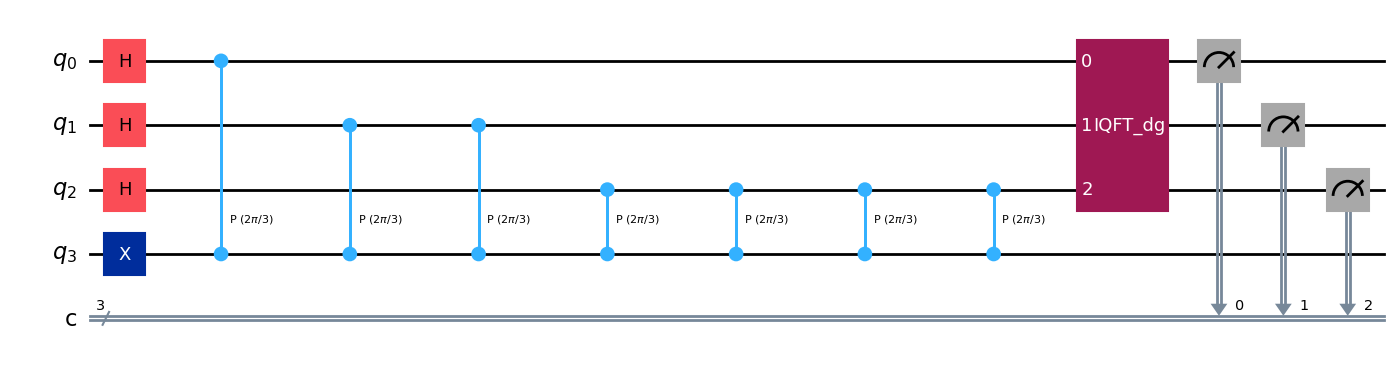

In [17]:
qpe2 = QuantumCircuit(4, 3)

for qubit in range(3):
    qpe2.h(qubit)

qpe2.x(3)


angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3); # controlled-T
    repetitions *= 2

qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])

for n in range(3):
    qpe2.measure(n,n)  

qpe2.draw(output='mpl')

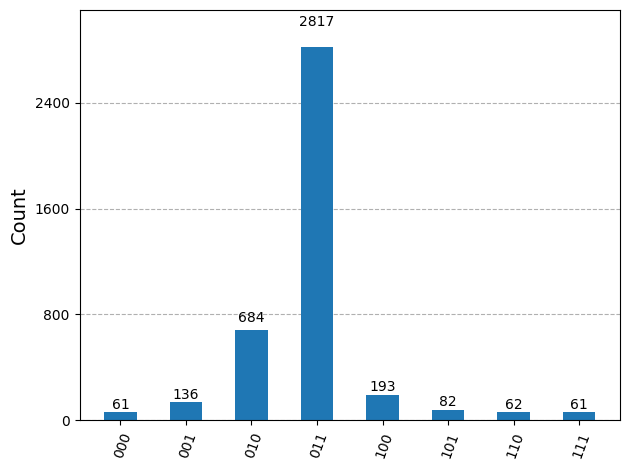

In [18]:
aer_sim = AerSimulator()
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Sonuç olarak $\theta = 0.3333\dots$ bekliyoruz ve en olası sonuçların `010(bin) = 2(dec)` ve `011(bin) = 3(dec)` olduğunu görüyoruz. Bu iki sonuç bize sırasıyla $\theta = 0,25$ (25% sapma) ve $\theta = 0,375$ (13% sapma) olduğunu gösterir. $\theta$'nın gerçek değeri, sayma bitlerinden elde edebileceğimiz değerler arasında yer alır ve bu da bize belirsizlik ve kesin olmayanlık sağlar.

### 3.2 Çözüm <a id=‘the_solution’></a>
Daha fazla hassasiyet elde etmek için daha fazla sayma kuantum bitleri ekliyoruz. İki sayma kuantum bitleri daha ekleyeceğiz:

/tmp/ipykernel_13172/1031673108.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))


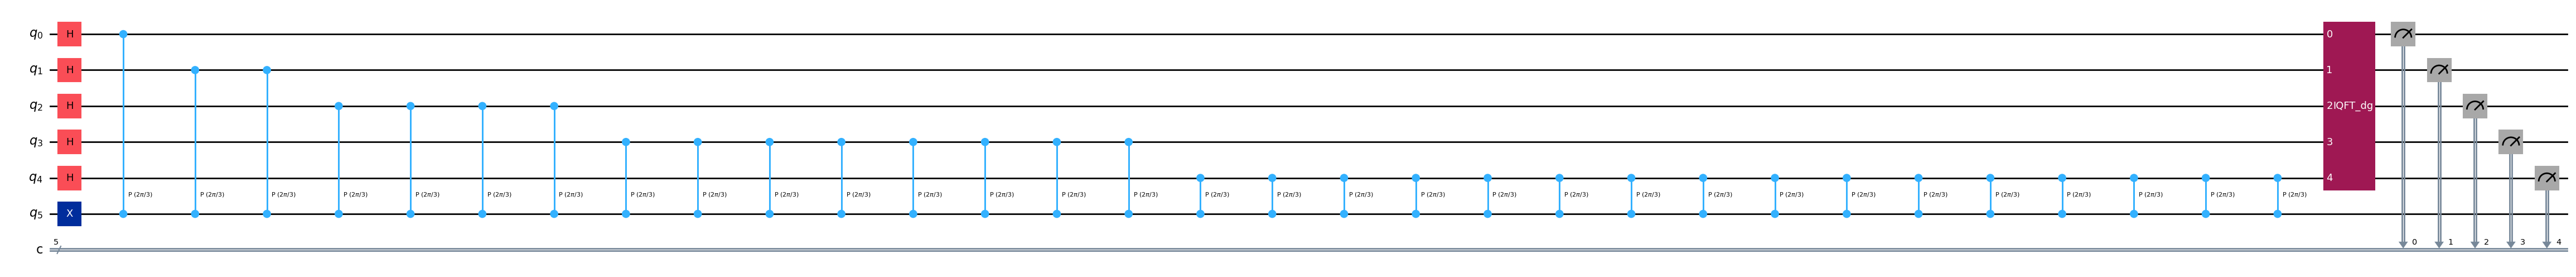

In [21]:
qpe3 = QuantumCircuit(6, 5)

for qubit in range(5):
    qpe3.h(qubit)

qpe3.x(5)


angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5); # controlled-T
    repetitions *= 2

qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

for n in range(5):
    qpe3.measure(n,n)  

qpe3.draw(output='mpl', fold=-1)

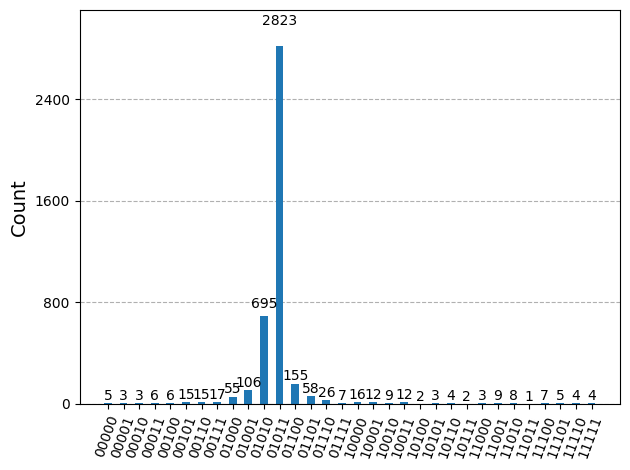

In [22]:
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

En olası iki ölçüm şu anda `01011` (ondalık 11) ve `01010` (ondalık 10) şeklindedir. Bu sonuçları ölçmek bize $\theta$'nın şu şekilde olduğunu gösterir:

$$
\theta = \frac{11}{2^5} = 0.344,\;\text{  veya  }\;\; \theta = \frac{10}{2^5} = 0.313
$$

Bu iki sonuç, $\frac{1}{3}$'ten sırasıyla %3 ve %6 oranında farklılık göstermektedir. Çok daha iyi bir hassasiyet!

## 4. Kaynakçalar <a id='references'></a>

[1] Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information: 10th Anniversary Edition (10th ed.). Cambridge University Press, New York, NY, USA. 